# Basic Usage

This tutorial will demonstrate the most basic Gryffin functionality. We will optimize a single parameter with respect to a simple one dimensional objective function. 

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import numpy as np
import pandas as pd
from gryffin import Gryffin

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import seaborn as sns
sns.set(context='talk', style='ticks')

ERROR:root:No traceback has been produced, nothing to debug.


Let's define the objective function and a helper function that will parse the Gryffin param dict for us:  

In [2]:
def objective(x):
    
    def sigmoid(x, l, k, x0):
        return l / (1 + np.exp(-k*(x-x0)))

    sigs = [sigmoid(x, -1, 40, 0.2),
            sigmoid(x,  1, 40, 0.4),
            sigmoid(x,  -0.7, 50, 0.6),
            sigmoid(x, 0.7, 50, 0.9)
           ]

    return np.sum(sigs, axis=0) + 1

def compute_objective(param):
    x = param['x']
    param['obj'] = objective(x)
    return param

Unlike in most use-cases, we can now visualize the objective function:

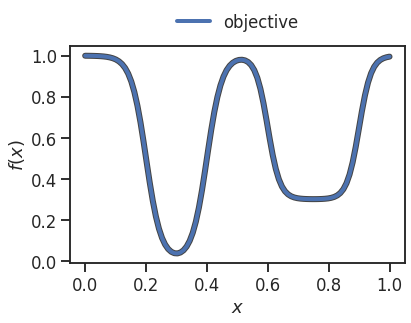

In [3]:
x = np.linspace(0, 1, 100)
_ = plt.plot(x, objective(x), linewidth=6, color='#444444')
_ = plt.plot(x, objective(x), linewidth=4, label='objective')
_ = plt.xlabel('$x$')
_ = plt.ylabel('$f(x)$')
_ = plt.legend(loc='lower center', ncol=2, bbox_to_anchor=(0.5 ,1.), frameon=False)

We define ``Gryffin``'s configuration as a dictionary. Note that the config can also be passed into ``Gryffin`` as a ``json`` file using the ``config_file`` argument. A continuous parameter ``x`` is defined and bounded by ``0.0 < x < 1.0``. We also define a minimization objective.

In [4]:
config = {
    "parameters": [
        {"name": "x", "type": "continuous", "low": 0., "high": 1., "size": 1}
    ],
    "objectives": [
        {"name": "obj", "goal": "min"}
    ]
}

``Gryffin``'s instance can now be initialized with the configuration above. Here we select ``silent=True`` to suppress the rich display in the notebook. Only warnings and errors will be printed.

In [5]:
gryffin = Gryffin(config_dict=config, silent=True)

In the cell below, we perform a sequential optimization for a maximum of 15 evaluations. 

In [6]:
%debug

observations = []
MAX_ITER = 15

for num_iter in range(MAX_ITER):
    print('-'*20, 'Iteration:', num_iter+1, '-'*20)
    
    # Query for new parameters
    params = gryffin.recommend(observations=observations)
    
    # Params is a list of dict, where each dict containts the proposed parameter values, e.g., {'x':0.5}
    # in this example, len(params) == 1 and we select the single set of parameters proposed
    param = params[0]
    print('  Proposed Parameters:', param, end=' ')
        
    # Evaluate the proposed parameters. "compute_objective" takes param, which is a dict, and adds the key "obj" with the
    # objective function value
    observation = compute_objective(param)
    print('==> :', observation['obj'])
    
    # Append this observation to the previous experiments
    observations.append(observation)

-------------------- Iteration: 1 --------------------


Could not find any observations, falling back to random sampling

  Proposed Parameters: {'x': 0.85985327} ==> : 0.3829059252850222
-------------------- Iteration: 2 --------------------
{'bias_loc': 0.0, 'bias_scale': 1.0, 'hidden_shape': 6, 'learning_rate': 0.05, 'num_draws': 1000, 'num_epochs': 2000, 'num_layers': 3, 'weight_loc': 0.0, 'weight_scale': 1.0}
here
Sequential(
  (linear1): BayesLinear(prior_mu=0.0, prior_sigma=1.0, in_features=1, out_features=6, bias=True)
  (relu1): ReLU()
  (linear2): BayesLinear(prior_mu=0.0, prior_sigma=1.0, in_features=6, out_features=1, bias=True)
)
BayesLinear(prior_mu=0.0, prior_sigma=1.0, in_features=1, out_features=6, bias=True)
here2
ReLU()
BayesLinear(prior_mu=0.0, prior_sigma=1.0, in_features=6, out_features=1, bias=True)
here2
{'weight_0': tensor([[-1.6142, -0.8541, -1.0287, -0.8812, -0.0362, -0.9161],
        [-1.6296, -2.0786, -0.9523, -0.8295, -0.2203, -1.6839],
        [-1.4362, -0.8384, -1.4848, -0.8497, -0.8624, -1.0217],
        ...,
        [-1.7061, -1.6743, -0.9764, -1.0882, -1.4251, -1.0485],


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 1)

Let's now plot all the parameters that have been probed and the best solution found.

In [ ]:
# objective function
x = np.linspace(0, 1, 100)
y = [objective(x_i) for x_i in x]

# observed parameters and objectives
samples_x = [obs['x'] for obs in observations]
samples_y = [obs['obj'] for obs in observations]

_ = plt.plot(x, y, linewidth=6, color='#444444')
_ = plt.plot(x, y, linewidth=4, label='objective')

_ = plt.scatter(samples_x, samples_y, zorder=10, s=150, color='r', edgecolor='#444444', label='samples')

# highlight best
_ = plt.scatter(samples_x[np.argmin(samples_y)], np.min(samples_y), zorder=11, s=150, 
                color='yellow', edgecolor='#444444', label='best')

# labels
_ = plt.xlabel('$x$')
_ = plt.ylabel('$f(x)$')
_ = plt.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5 ,1.), frameon=False)